# Reading TXPipe Outputs

This notebook shows you how to use the TXPipe library to read output files generated by the pipeline.

It assumes you have already run the example "metacal" pipeline, which you can do like this: `ceci examples/metacal/pipeline.yml`

In [1]:
%matplotlib inline
import numpy as np
import ceci
import matplotlib.pyplot as plt
import healpy
import os

# We change directory to the main TXPipe dir. The if statement
# stops us from doing this twice if we run this cell again.
if 'txpipe' not in locals():
    pwd = os.getcwd()
    os.chdir(f'{pwd}/..')
    import txpipe

## Pipelines & Outputs


TXPipe generates a lot of output files. Let's look in the output directory for the metacal pipeline to see them all.

In [2]:
output_dir = "data/example/outputs"
files = sorted(os.listdir(output_dir))

for filename in files:
    print(filename)

T_frac_psf_residual_hist.png
aperture_mass_data.sacc
aux_lens_maps.hdf5
aux_source_maps.hdf5
binned_lens_catalog.hdf5
binned_random_catalog.hdf5
binned_shear_catalog.hdf5
binned_star_catalog.hdf5
bright_object_map.png
brighter_fatter_data.hdf5
brighter_fatter_plot.png
convergence_map.png
convergence_maps.hdf5
density_maps.hdf5
density_xi.png
density_xi_ratio.png
depth_map.png
e1_psf_residual_hist.png
e2_psf_residual_hist.png
flag_map.png
g1_hist.png
g2_hist.png
g_T.png
g_psf_T.png
g_psf_g.png
g_snr.png
gammat_bright_stars.sacc
gammat_bright_stars_plot.png
gammat_dim_stars.sacc
gammat_dim_stars_plot.png
gammat_field_center.sacc
gammat_field_center_plot.png
gammat_randoms.sacc
gammat_randoms_plot.png
jk.png
lens_mag_hist.png
lens_map.png
lens_maps.hdf5
lens_noise_maps.hdf5
lens_photoz_pdfs.hdf5
lens_photoz_stack.hdf5
lens_snr_hist.png
lens_tomography_catalog.hdf5
map_systematic_correlations
mask.hdf5
mask_map.png
nz_lens.png
nz_source.png
patch_centers.txt
photoz_source_model.pkl
psf_map

---
## Reading files

Input and output files in TXPipe have a class which represents their type, and can be used to open files of that type. Some of these are generic, like `HDFFile` or `PNGFile`, and some are specialized, like `TomographyCatalog`.

TXPipe classes declare what kind of inputs and outputs they are expecting, and then use the `open_input` or `open_output` to open them for reading and writing. Outside TXPipe we can use those classes directly.


---
## Catalogs

Catalogs in TXPipe are saved as HDF5 files, since these can be both read and written in parallel at NERSC very fast.

Let's explore one catalog-type output, the shear tomography catalog. This is saved in the form `txpipe.data_types.TomographyCatalog`, and stores an integer tomographic bin choice for each object, as well as various other metadata.

In [3]:
filename = output_dir + "/shear_tomography_catalog.hdf5"

# open for reading
f = txpipe.data_types.TomographyCatalog(filename, "r")

Many of the data type classes have some handy methods for querying the data inside. For example, the `TomographyCatalog` class has these methods:

In [4]:
print('source bins:', f.read_nbin('source'))
print('source bin edges:', f.read_zbins('source'))

source bins: 4
source bin edges: [(0.5, 0.7), (0.7, 0.9), (0.9, 1.1), (1.1, 2.0)]


### Exploring catalogs

For every TXPipe data class, you can access the underlying file object using `f.file`. You can use this to access the underlying implementation, like `fitsio.FITS` or just a python `file` object.

For HDF5 files, you get an `h5py.File` instance. This has many handy methods; the `keys()` method is the way to explore the contents of the file:

In [5]:
f.file.keys()

<KeysViewHDF5 ['metacal_response', 'provenance', 'tomography']>

These are all groups within the file. You use `[]` to look inside a group, at what data sets (or sub-groups) are inside.

In [6]:
group = f.file['tomography']
group.keys()

<KeysViewHDF5 ['N_eff', 'N_eff_2d', 'mean_e1', 'mean_e1_2d', 'mean_e2', 'mean_e2_2d', 'sigma_e', 'sigma_e_2d', 'source_bin', 'source_counts', 'source_counts_2d']>

To read a dataset we have to choose which choose a chunk to read - they are not loaded automatically. We could use `:` for the whole data set, but here will read a small chunk from the middle of the file:

In [7]:
d = f.file['tomography/source_bin']
print(d)

# Since this file comes from DC2, which is organized by redshift
# the pattern of which bins objects are in is a bit odd looking
print(d[10000:10200])

<HDF5 dataset "source_bin": shape (82200,), type "<i4">
[ 0 -1 -1 -1 -1  0  0 -1 -1  0  0 -1 -1 -1 -1  0  0 -1  0  0 -1  0 -1  0
  0 -1  0  0 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0  0
 -1  0 -1 -1 -1 -1 -1  0 -1  0  0 -1  0  0 -1  0 -1  0 -1 -1 -1 -1 -1  0
 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1 -1  0  0 -1
 -1 -1  0 -1 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1  0 -1
 -1  0 -1 -1  0 -1 -1 -1  0 -1  0  0 -1  0 -1  0 -1  0 -1  0 -1 -1 -1 -1
  0  0 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1  0 -1  0 -1 -1  0  0  0
 -1  0  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0 -1  0  0
 -1 -1 -1 -1 -1 -1  0 -1]


---
## Maps

TXPipe map files use the class `txpipe.data_types.MapsFile`. They can store a collection of maps, in either flat or Healpix pixelizations. It's also easy to add new pixelizations if we need to.



In [8]:
filename = output_dir + "/density_maps.hdf5"
m = txpipe.data_types.MapsFile(filename, "r")

maps in file: ['delta_0', 'delta_1']


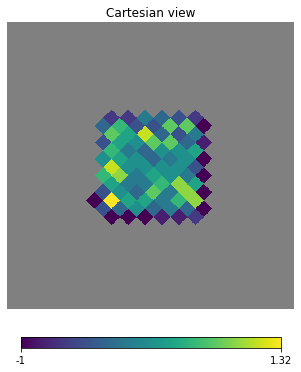

In [9]:
# listing maps
print('maps in file:', m.list_maps())

# reading a map
d0 = m.read_map('delta_1')
healpy.cartview(d0, lonra=[59, 62], latra=[-32, -29])

---
## Number Density n(z)

Number density maps are stored with the class `txpipe.data_types.NOfZFile`:

In [10]:
filename = output_dir + "/shear_photoz_stack.hdf5"
nz = txpipe.data_types.NOfZFile(filename, "r")

This too has the most obvious methods you would need:

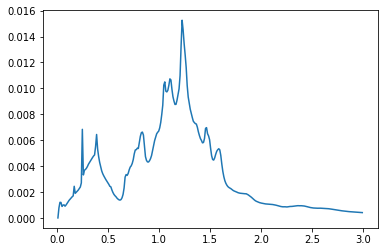

In [11]:
# For getting the number of bins
nbin = nz.get_nbin('source')

# For getting the z and n(z) array for this bin
z, nzi = nz.get_n_of_z('source', 3)
plt.plot(z, nzi)

It also has the handy `plot` method:

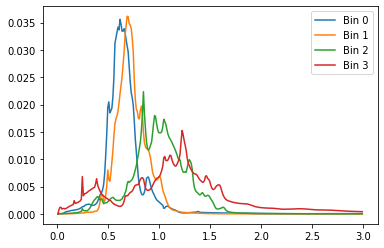

In [12]:
nz.plot('source')
plt.legend()

---
## Two-point functions

Two-point correlation functions made by TXPipe are stored in SACC format.  SACC is a library made by DESC for storing measurements and their covariances. You can learn more about it at https://sacc.readthedocs.io

Since the SACC library is already developed for DESC and has methods useful to us, you would normally use the `.file` object directly and not the TXPipe wrapper.

In [13]:
filename = output_dir + "/twopoint_theory_real.sacc"

sf = txpipe.data_types.SACCFile(filename, "r")
s = sf.file

['galaxy_density_xi', 'galaxy_shearDensity_xi_t', 'galaxy_shear_xi_minus', 'galaxy_shear_xi_plus']


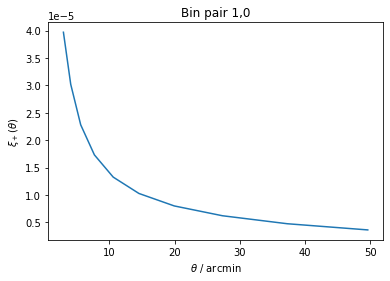

In [14]:
# what data types are included in the file
print(s.get_data_types())

# what bin pairs this type has
xip_pairs = s.get_tracer_combinations('galaxy_shear_xi_plus')

# get theta and xi specifically. You can also use s.get_mean and s.get_tag to get more info manually
theta, xi = s.get_theta_xi('galaxy_shear_xi_plus', 'source_1', 'source_0')

plt.plot(theta, xi)
plt.xlabel(r"$\theta$ / arcmin")
plt.ylabel(r"$\xi_+(\theta)$")
plt.title("Bin pair 1,0");